<a href="https://colab.research.google.com/github/takemyt1me/DL_practice/blob/main/MNIST_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data() #return data

# plt.matshow(x_train[1]) #show image
# print(y_train[1])
x_train = x_train/255
x_test = x_test/255

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

# print(x_train_flattened.shape) #reshape data to 1-dimensional
# print(x_test_flattened.shape)

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

model.evaluate(x_test_flattened, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8116 - loss: 0.7194
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9136 - loss: 0.3071
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9211 - loss: 0.2817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9233 - loss: 0.2738
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9269 - loss: 0.2576
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9142 - loss: 0.3067


[0.26955828070640564, 0.925000011920929]

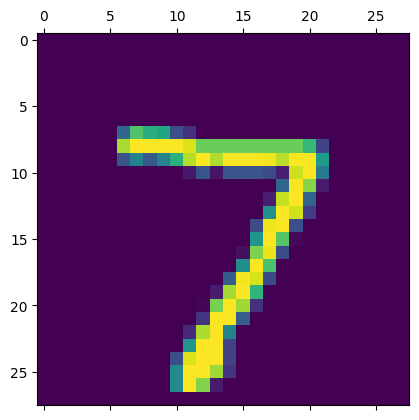

In [18]:
plt.matshow(x_test[0])

In [21]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.4018507e-02, 2.5719245e-07, 6.1394725e-02, 9.4513905e-01,
       1.4365446e-03, 7.6278627e-02, 1.1983846e-06, 9.9977463e-01,
       9.0709217e-02, 6.2501454e-01], dtype=float32)

In [30]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [29]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [31]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm #confusion matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    2,    0,    4,    2,    1,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   8,    9,  915,   20,    8,    4,   11,   10,   43,    4],
       [   3,    0,   17,  934,    0,   15,    2,   12,   22,    5],
       [   2,    2,    6,    2,  914,    0,    7,    4,    8,   37],
       [  11,    3,    6,   45,    6,  762,    8,    7,   38,    6],
       [  18,    3,   10,    1,    7,   14,  900,    2,    3,    0],
       [   1,    6,   23,    6,    7,    0,    0,  956,    2,   27],
       [   8,    8,    5,   22,    9,   22,    8,   13,  873,    6],
       [  11,    7,    1,   10,   29,    6,    0,   30,    6,  909]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

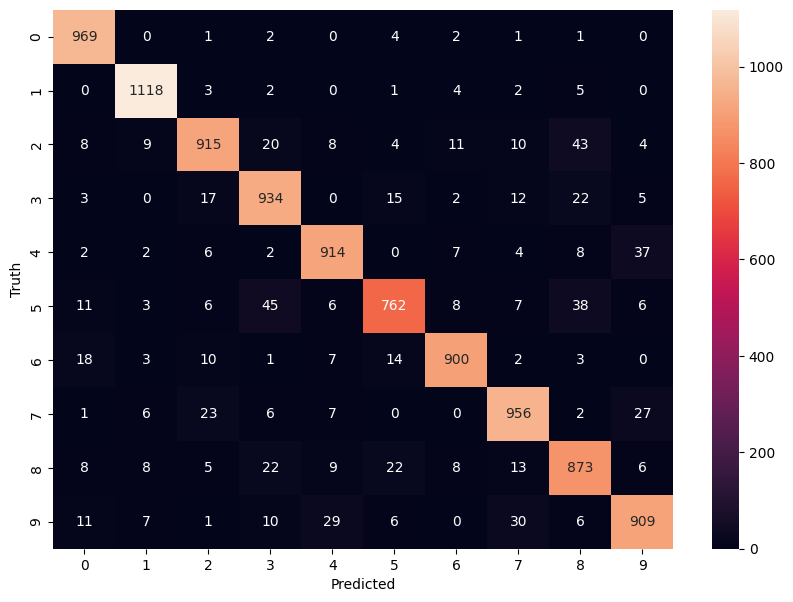

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')